<a href="https://colab.research.google.com/github/arunsingh22/CaseStudies/blob/master/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import auc,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from tqdm import tqdm
from collections import Counter
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/My Drive/preprocessed_data.csv",nrows=50000)
data.columns

Index(['school_state', 'teacher_prefix', 'project_grade_category',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'price'],
      dtype='object')

In [ ]:
y = data["project_is_approved"].values
print(data.project_is_approved.value_counts())
print("Remark : Data is highly imbalance")

#Dropping the project approved column from data
X = data.drop(["project_is_approved"],axis=1)

1    41993
0     8007
Name: project_is_approved, dtype: int64
Remark : Data is highly imbalance


In [ ]:
#Splitting the data into train,CV,test.
train_data,test_data,train_label,test_label = train_test_split(X,y,test_size = 0.3,stratify =y)

print()
print("Train dataset: ",train_data.shape)
print("Test dataset: ",test_data.shape)
print()
print(Counter(train_label))



Train dataset:  (35000, 8)
Test dataset:  (15000, 8)

Counter({1: 29395, 0: 5605})


####**Importing Project title and encoding**

In [ ]:
project= pd.read_csv("/content/drive/My Drive/Assignment_2/train_data.csv",nrows=50000)
project_title = project["project_title"].values #extracting the project title from the entire file

#Credits: https://colab.research.google.com/drive/1nUiNc5Cb38nTLjUopfNKgPL6g9jZmPY7#scrollTo=d6RCdphRCyn0
print("^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^")
import re
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

processed_project_title = []
# tqdm is for printing the status bar
for sentance in tqdm(project_title):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split())
    processed_project_title.append(sent.lower().strip())
project_title = processed_project_title
print()
print(project_title)
print()
project_title = pd.Series(project_title) # changing the dtype of project_title
train_project_title,test_project_title = train_test_split(project_title,test_size =0.3)


 15%|█▌        | 7566/50000 [00:00<00:00, 75655.74it/s]

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


100%|██████████| 50000/50000 [00:00<00:00, 76522.64it/s]


['educational support for english learners at home', 'wanted projector for hungry learners', 'soccer equipment for awesome middle school students', 'techie kindergarteners', 'interactive math tools', 'flexible seating for mrs jarvis terrific third graders', 'chromebooks for special education reading program', 'it is the 21st century', 'targeting more success in class', 'just for the love of reading pure pleasure', 'reading changes lives', 'elevating academics and parent rapports through technology', 'building life science experiences', 'everyone deserves to be heard', 'tablets can show us the world', 'making recess active', 'making great leap is with leapfrog', 'technology teaches tomorrow is talents today', 'test time', 'wiggling our way to success', 'magic carpet ride in our library', 'from sitting to standing in the classroom', 'books for budding intellectuals', 'instrumental power conquering steam', 's t e a m challenges science technology engineering art math', 'math masters', 't

## **SET 1: Using TFIDF for featurization**



In [ ]:
# Encoding essay into onehot encoding using Tfidf

vect = TfidfVectorizer(min_df=10,max_features=2000)               
TFidf_Train_essay = vect.fit_transform(train_data["essay"].values)
TFidf_test_essay = vect.transform(test_data["essay"].values) #Tfidf for test data

print()
print("TFidf_Train_essay: ",TFidf_Train_essay.shape)
print("TFidf_test_essay: ",TFidf_test_essay.shape)
print()

#TFidf encoding of the project Title:
vect = TfidfVectorizer()
TFidf_Train_project_title = vect.fit_transform(train_project_title)
TFidf_Test_project_title = vect.transform(test_project_title)  # Test data encoded

print("TFidf_Train_project_title: ",TFidf_Train_project_title.shape)
print("TFidf_Test_project_title: ",TFidf_Test_project_title.shape)
print()


TFidf_Train_essay:  (35000, 2000)
TFidf_test_essay:  (15000, 2000)

TFidf_Train_project_title:  (35000, 9878)
TFidf_Test_project_title:  (15000, 9878)



In [ ]:
#Credits: https://colab.research.google.com/drive/1EkYHI-vGKnURqLL_u5LEf3yb0YJBVbZW#scrollTo=jYm1BGtSPSxF&forceEdit=true&sandboxMode=true
# Taking all categorical features together 
#Encoding the categorical features School state
vect = CountVectorizer()
train_school_state_OHE = vect.fit_transform(train_data.school_state.values)
#OHE for test data
test_school_state_OHE = vect.transform(test_data["school_state"].values)
print("train_school_state_OHE:",train_school_state_OHE.shape)
print("test_school_state_OHE:",test_school_state_OHE.shape)  # Test data encoded
print()

#Encoding the categorical features teacher prefix
vect = CountVectorizer()
train_teacher_prefix_OHE = vect.fit_transform(train_data.teacher_prefix.values)
test_teacher_prefix_OHE = vect.transform(test_data["teacher_prefix"].values) # Test data encoded
print("train_teacher_prefix_OHE: ",train_teacher_prefix_OHE.shape)
print("test_teacher_prefix_OHE:",test_teacher_prefix_OHE.shape)
print()

#Encoding the categorical features project_grade_category
vect = CountVectorizer()
train_project_grade_category_OHE = vect.fit_transform(train_data.project_grade_category.values)
test_project_grade_category_OHE = vect.transform(test_data["project_grade_category"].values) # Test data encoded
print("train_project_grade_category_OHE: ",train_project_grade_category_OHE.shape)
print("test_project_grade_category_OHE: ",test_project_grade_category_OHE.shape)
print()

#Encoding the categorical features clean_categories	
vect = CountVectorizer()
train_clean_categories_OHE = vect.fit_transform(train_data.clean_categories.values)
test_clean_categories_OHE = vect.transform(test_data["clean_categories"].values)# Test data encoded
print("train_clean_categories_OHE:",train_clean_categories_OHE.shape)
print("test_clean_categories_OHE:",test_clean_categories_OHE.shape)
print()

#Encoding the categorical features clean_subcategories	
vect = CountVectorizer()
train_clean_subcategories_OHE = vect.fit_transform(train_data.clean_subcategories.values)
test_clean_subcategories_OHE = vect.transform(test_data["clean_subcategories"].values)
print("train_clean_subcategories_OHE:",train_clean_subcategories_OHE.shape)
print("test_clean_subcategories_OHE:",test_clean_subcategories_OHE.shape)
print()

train_school_state_OHE: (35000, 51)
test_school_state_OHE: (15000, 51)

train_teacher_prefix_OHE:  (35000, 5)
test_teacher_prefix_OHE: (15000, 5)

train_project_grade_category_OHE:  (35000, 4)
test_project_grade_category_OHE:  (15000, 4)

train_clean_categories_OHE: (35000, 9)
test_clean_categories_OHE: (15000, 9)

train_clean_subcategories_OHE: (35000, 30)
test_clean_subcategories_OHE: (15000, 30)



###**Encoding Numerical Features : Price + Teachers_No._of_previously_posted_Project**

In [ ]:
#Credits :https://colab.research.google.com/drive/1EkYHI-vGKnURqLL_u5LEf3yb0YJBVbZW#scrollTo=rNl4cZNlPSxK&forceEdit=true&sandboxMode=true 
from sklearn.preprocessing import StandardScaler
normalizer = StandardScaler()
train_price = normalizer.fit_transform(train_data['price'].values.reshape(-1,1))
test_price = normalizer.transform(test_data['price'].values.reshape(-1,1))
print("train_price: ",train_price.shape)
print("test_price: ",test_price.shape)
print()

normalizer = StandardScaler()
train_prev_posted_proj = normalizer.fit_transform(train_data['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
test_prev_posted_proj = normalizer.transform(test_data['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
print("train_prev_posted_proj",train_prev_posted_proj.shape)
print("test_prev_posted_proj",test_prev_posted_proj.shape)
print()


train_price:  (35000, 1)
test_price:  (15000, 1)

train_prev_posted_proj (35000, 1)
test_prev_posted_proj (15000, 1)



###**Putting all the features togther using hstack with TFidf representation**

In [ ]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
train_tfidf = hstack((TFidf_Train_essay,TFidf_Train_project_title,train_school_state_OHE,train_teacher_prefix_OHE,train_project_grade_category_OHE,train_clean_categories_OHE,
                  train_clean_subcategories_OHE,train_price,train_prev_posted_proj)).tocsr()

test_tfidf = hstack((TFidf_test_essay,TFidf_Test_project_title,test_school_state_OHE,test_teacher_prefix_OHE,test_project_grade_category_OHE,test_clean_categories_OHE,
                     test_clean_subcategories_OHE,test_price,test_prev_posted_proj)).tocsr()

print()
print("train_tfidf: ",train_tfidf.shape)
print("test_tfidf:",test_tfidf.shape)


train_tfidf:  (35000, 14979)
test_tfidf: (15000, 14979)


In [ ]:
print(train_tfidf.shape)
print(train_label.shape)

(35000, 14979)
(35000,)


### **DecsionTreeClassifier on SET 1**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
params = {
    "max_depth":[1,5,10,15,20,50],
    "min_samples_leaf":[5,10,50,100,500],
    'class_weight':["balanced"]
}
model = GridSearchCV(clf,param_grid=params,n_jobs=-1,verbose=1,return_train_score=True,scoring="roc_auc",cv=5)
model.fit(train_tfidf,train_label)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   54.6s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 12.4min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'max_depth': [1, 5, 10, 15, 20, 50],
                     

In [ ]:
# Ploting the AUC curve to find the best parameters for the Decision tree.
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
%matplotlib inline 
init_notebook_mode(connected = True)

max_depth= [1,5,10,15,20,50]
min_samples_leaf = [5,10,50,100,500]

results = pd.DataFrame.from_dict(model.cv_results_)
results = results.sort_values(['param_max_depth'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
alpha =  results['param_max_depth']

# https://plot.ly/python/3d-axes/
trace1 = go.Scatter3d(x=max_depth,y=min_samples_leaf,z=train_auc, name = 'train')
trace2 = go.Scatter3d(x=max_depth,y=min_samples_leaf,z=cv_auc, name = 'Cross validation')
data = [trace1,trace2]

layout = go.Layout(scene = dict(
        xaxis = dict(title='n_estimators'),
        yaxis = dict(title='max_depth'),
        zaxis = dict(title='AUC'),))

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='3d-scatter-colorscale')



In [ ]:
#Getting the best hyperparameters 
model.best_params_

{'class_weight': 'balanced', 'max_depth': 15, 'min_samples_leaf': 500}



Confusion matrix: 
[[    0  2402]
 [    0 12598]]

Accuracy score: 0.8398666666666667


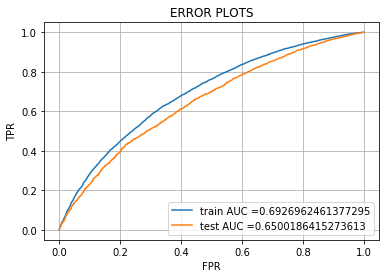

In [ ]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_curve,auc,confusion_matrix,accuracy_score
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=15,min_samples_leaf=500,class_weight="balanced")
model1 = CalibratedClassifierCV(clf,cv=3)
model1.fit(train_tfidf,train_label)
print()

fig, ax = plt.subplots()
y_train_pred = model1.predict_proba(train_tfidf)    
y_test_pred = model1.predict_proba(test_tfidf) 

train_fpr, train_tpr, tr_thresholds = roc_curve(train_label, y_train_pred[:,1])
test_fpr, test_tpr, te_thresholds = roc_curve(test_label, y_test_pred[:,1])

ax.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
ax.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
ax.legend()
ax.set_xlabel("FPR")
ax.set_ylabel("TPR")
ax.set_title("ERROR PLOTS")
ax.grid()

print()
y_hat = model1.predict(test_tfidf)
print("Confusion matrix: ")
print(confusion_matrix(test_label,y_hat))
print()
print("Accuracy score:",accuracy_score(test_label,y_hat))


### **Word Cloud on False Positive data**

In [ ]:
test_data["predict"] = y_hat
test_data["project_approved"]=test_label
test_data.columns

In [ ]:
# d = test_data[test_data.predict == test_data.project_approved.]
d= test_data.loc[(test_data['predict']==1) & (test_data['project_approved']==0)]
d.head()

school_state teacher_prefix  ... predict  project_approved
49661           ca            mrs  ...       1                 0
19753           ok             ms  ...       1                 0
34341           md             ms  ...       1                 0
12985           nj             mr  ...       1                 0
24517           sc            mrs  ...       1                 0

[5 rows x 10 columns]

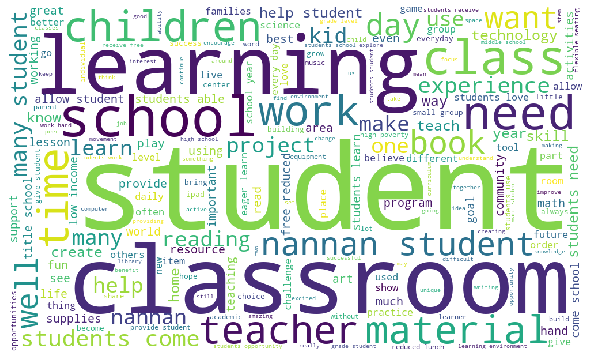

In [ ]:
#Credits:https://www.geeksforgeeks.org/generating-word-cloud-python/
# word cloud using false positive rate 
# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
s = d.essay  
comment_words = ' '
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in s: 
  # typecaste each val to string 
  val = str(val) 
  # split the value 
  tokens = val.split() 
  # Converts each token into lowercase 
  for i in range(len(tokens)): 
    tokens[i] = tokens[i].lower() 
  for words in tokens: 
    comment_words = comment_words + words + ' '
    
wordcloud = WordCloud(width = 1000, height = 600, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

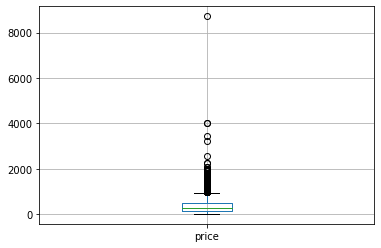

In [ ]:
d.boxplot("price")

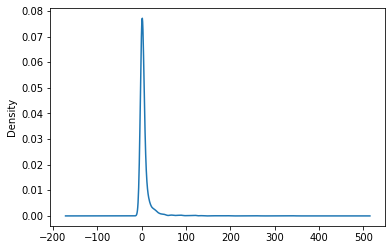

In [ ]:
# PDF of teacher_previous_posted projects
d["teacher_number_of_previously_posted_projects"].plot.kde()


## **SET 2: Using TFIDF-Word2Vec for featurization**

In [ ]:
# Credits:https://colab.research.google.com/drive/1EkYHI-vGKnURqLL_u5LEf3yb0YJBVbZW#scrollTo=ka6B7i6vPSx3
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
import pickle
with open('/content/drive/My Drive/Assignment_2/glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [ ]:
#Tf-idf Word2Vec model for Essay column
tfidf_model = TfidfVectorizer()
tfidf_model.fit(train_data["essay"].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_train_essay_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(train_data["essay"].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_train_essay_vectors.append(vector)

print(len(tfidf_w2v_train_essay_vectors))
print(len(tfidf_w2v_train_essay_vectors[0]))

print("^"*200)

# compute tfidf_avg_word2vec for each test_essay.
tfidf_model.fit(test_data["essay"].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

# compute average word2vec for each review.
tfidf_w2v_test_essay_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(test_data["essay"].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_test_essay_vectors.append(vector)

print(len(tfidf_w2v_test_essay_vectors))
print(len(tfidf_w2v_test_essay_vectors[0]))

print("^"*200)

# compute tfidf_avg_word2vec for each test_essay.
# tfidf_model.fit(X_cv["essay"].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())


100%|██████████| 35000/35000 [01:11<00:00, 490.70it/s]


35000
300
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


100%|██████████| 15000/15000 [00:30<00:00, 493.39it/s]

15000
300
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


### **Tfidf_avg_W2V for project Title**

In [ ]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(train_project_title)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_train_project_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(train_project_title): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_train_project_title.append(vector)

print(len(tfidf_w2v_train_project_title))
print(len(tfidf_w2v_train_project_title[0]))

print("^"*200)

# compute tfidf_avg_word2vec for each test_essay.
tfidf_model.fit(test_project_title)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

# compute average word2vec for each review.
tfidf_w2v_test_project_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(test_project_title): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_test_project_title.append(vector)

print(len(tfidf_w2v_test_project_title))
print(len(tfidf_w2v_test_project_title[0]))


  9%|▉         | 1421/15000 [00:00<00:00, 14209.57it/s]

35000
300
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


100%|██████████| 15000/15000 [00:00<00:00, 21461.27it/s]


15000
300


In [ ]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_train_tfidf_w2v = hstack((train_clean_categories_OHE,train_clean_subcategories_OHE,train_project_grade_category_OHE,train_teacher_prefix_OHE,
                  tfidf_w2v_train_project_title,tfidf_w2v_train_essay_vectors,train_prev_posted_proj,train_price,train_school_state_OHE)).tocsr()

X_test_tfidf_w2v = hstack((test_clean_categories_OHE,test_clean_subcategories_OHE,test_project_grade_category_OHE,test_teacher_prefix_OHE,
                           tfidf_w2v_test_project_title,tfidf_w2v_test_essay_vectors,test_prev_posted_proj,test_price,test_school_state_OHE)).tocsr()

print(X_train_tfidf_w2v.shape)
print(X_test_tfidf_w2v.shape)

(35000, 701)
(15000, 701)


In [ ]:
# #Balancing the dataset
# from collections import Counter
# from imblearn.over_sampling import RandomOverSampler

# print("Before bal train_data.shape: ",X_train_tfidf_w2v.shape,Counter(train_label))
# rnd = RandomOverSampler(ratio=1)
# X_train_tfidf_w2v,train_label_tfidfw2v=rnd.fit_sample(X_train_tfidf_w2v,train_label)
# print("After bal train_data.shape:{0},{1} ",X_train_tfidf_w2v.shape,Counter(train_label_tfidfw2v))

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
params = {
    "max_depth":[1,5,10,15,50],
    "min_samples_leaf":[5,10,100,500],
    'class_weight':['balanced']
}
model = GridSearchCV(clf,param_grid=params,n_jobs=-1,verbose=1,return_train_score=True,scoring="roc_auc",cv=5)
model.fit(X_train_tfidf_w2v,train_label)
print()
model.best_params_

In [ ]:
mo

In [ ]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_curve,auc,confusion_matrix,accuracy_score
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=5,min_samples_leaf=500,class_weight="balanced")
model = CalibratedClassifierCV(clf,cv=3)
model.fit(X_train_tfidf_w2v,train_label)
print()

y_train_pred = model.predict_proba(X_train_tfidf_w2v)    
y_test_pred = model.predict_proba(X_test_tfidf_w2v) 

train_fpr, train_tpr, tr_thresholds = roc_curve(train_label, y_train_pred[:,1])
test_fpr, test_tpr, te_thresholds = roc_curve(test_label, y_test_pred[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()
print()
y_hat = model.predict(X_test_tfidf_w2v)
print("Confusion matrix: ")
print(confusion_matrix(test_label,y_hat))
print()
print("Accuracy score:",accuracy_score(test_label,y_hat))

##**SET 3: Decision Tree build on Non zero Features**

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(train_tfidf,train_label)
top_features = clf.feature_importances_


## **Summary Table**

In [ ]:
from prettytable import PrettyTable    
x = PrettyTable()

x.field_names = ["Set No.", "Vectorizer", "Best Alpha", "AUC score"]

x.add_row(["Model 1", "BOW", 700, 0.5])
x.add_row(["Model 2", "Tfidf", 142, 0.5])
x.add_row(["Model 3", "Glove:W2V", 10, 0.48])
x.add_row(["Model 4", "Avg W2v", 9, 0.51])
x.add_row(["Model 5", "Tfidf w/o Text", 10, 0.5])

print(x)
